# Assignment 1

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
# Drop the 3 columns that are not needed
df = df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)

In [4]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

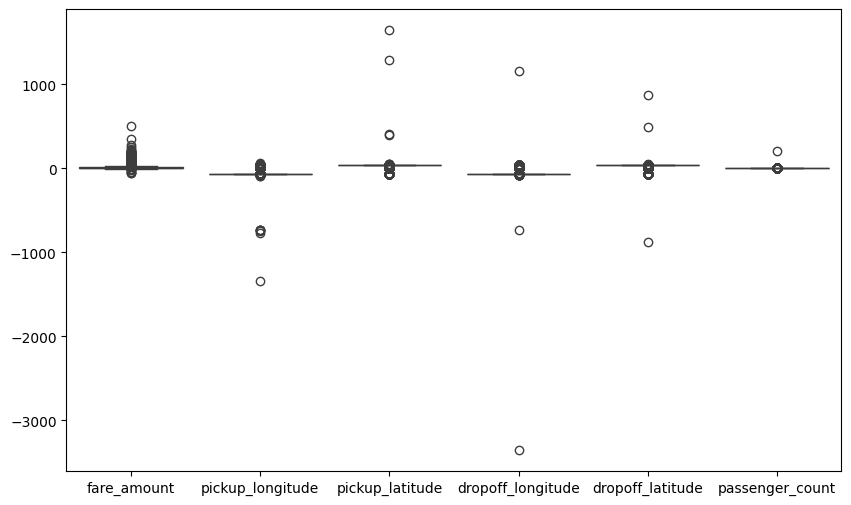

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [7]:
# remove outliers
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lb) & (df[col] <= ub)]

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [9]:
scaled_df

array([[-0.2932847 , -1.1178711 , -0.67988539, -1.10660975, -1.33944605,
        -0.47502273],
       [-0.24166807, -0.77733472, -1.15915782, -0.81952246, -0.1218992 ,
        -0.47502273],
       [ 1.10036418, -1.44370658, -0.565552  ,  1.10237707,  0.88068643,
        -0.47502273],
       ...,
       [-0.2932847 , -0.17673965, -0.75165417, -1.53471183, -0.60271092,
        -0.47502273],
       [ 1.51329718, -0.94995784, -1.29035095, -0.13227415, -2.58814233,
        -0.47502273],
       [ 1.41006393, -0.15635196, -1.54470586, -0.2693492 ,  0.70758523,
        -0.47502273]])

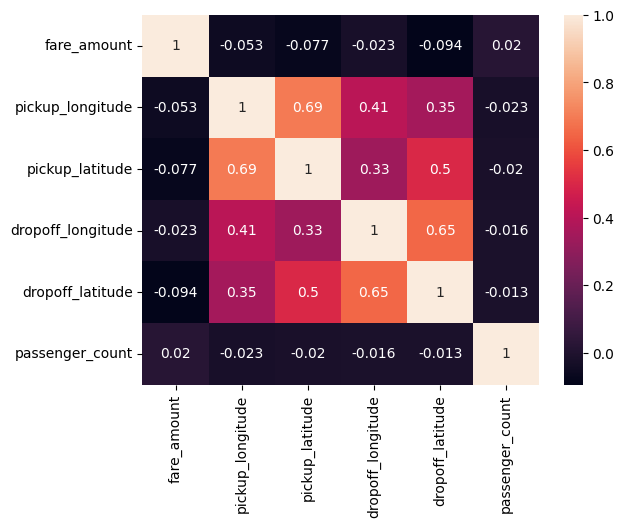

In [10]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]]
Y = df["fare_amount"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
r2score = r2_score(Y_test,y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE: ",rmse)

R2 Score:  0.014066351988429537
RMSE:  3.845029040158088


## Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,Y_train)

RandomForestRegressor()

In [17]:
y_pred = model1.predict(X_test)
y_pred

array([ 7.697,  5.362, 12.487, ...,  9.138,  5.609,  9.969])

In [18]:
r2score = r2_score(Y_test,y_pred)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE: ",rmse)

R2 Score:  0.7024694743308888
RMSE:  2.112231644575547
